# Task 6. Algorithms on graphs. Path search algorithms on weighted graphs

## Samarin Anton, C4113

### March 5, 2020

In [1]:
import warnings
import networkx as nx
from random import sample
import sys
import numpy as np

np.set_printoptions(threshold=sys.maxsize)
warnings.filterwarnings('ignore')

In [2]:
# for more beauty image
%matplotlib notebook

## Part 1

In [3]:
nodes = 100
edges = 500

In [4]:
graph = nx.gnm_random_graph(nodes, edges, seed=42)

In [5]:
for v, u, w in graph.edges(data=True):
    w['weight'] = np.random.randint(1, 100)

<IPython.core.display.Javascript object>


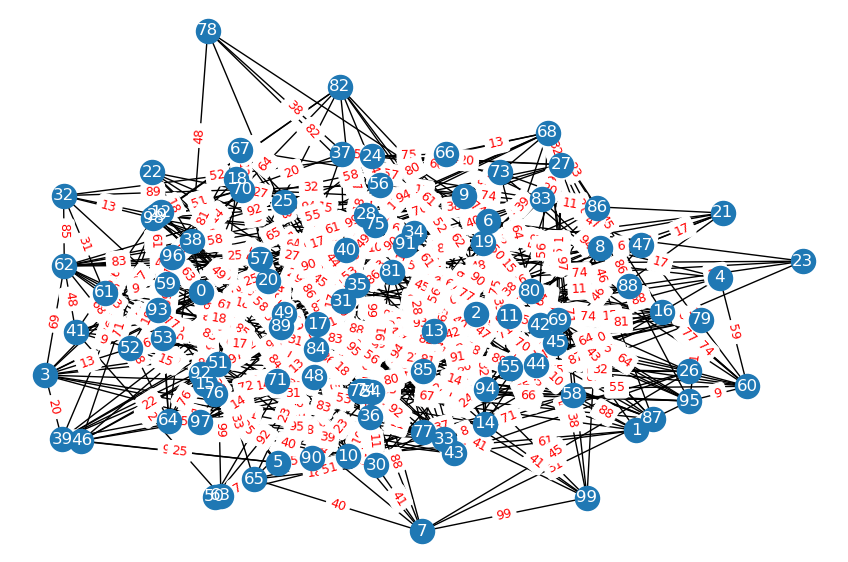

In [6]:
pos = nx.kamada_kawai_layout(graph)

nx.draw(graph, pos, with_labels=True, font_color='w')
labels = nx.get_edge_attributes(graph, 'weight')
_ = nx.draw_networkx_edge_labels(graph, pos, edge_labels=labels, font_size=9, font_color='r')

In [7]:
source = np.random.randint(0, nodes - 1)
print(f'Start node is {source}')

Start node is 36


In [8]:
def show_partial_result(path, length, ends):
    for end in ends:
        print(f'path from {source} to {end}:')
        print(path[end])
        print('weight of path:')
        print(length[end])
        print()

In [9]:
length, path = nx.single_source_dijkstra(graph, source=source, weight='weight')

In [10]:
print("Dijkstra's algorithm", end='\n\n')
show_partial_result(length, path, [3, 44, 76])

Dijkstra's algorithm

path from 36 to 3:
61
weight of path:
[36, 10, 3]

path from 36 to 44:
39
weight of path:
[36, 77, 55, 44]

path from 36 to 76:
37
weight of path:
[36, 54, 76]



In [11]:
length, path = nx.single_source_bellman_ford(graph, source=source, weight='weight')

In [12]:
print('Bellman-Ford algorithm', end='\n\n')
show_partial_result(length, path, [3, 44, 76])

Bellman-Ford algorithm

path from 36 to 3:
61
weight of path:
[36, 10, 3]

path from 36 to 44:
39
weight of path:
[36, 77, 55, 44]

path from 36 to 76:
37
weight of path:
[36, 54, 76]



In [35]:
%%timeit -n 10 -r 5

nx.single_source_bellman_ford(graph, source=source, weight='weight')

1.63 ms ± 1.11 ms per loop (mean ± std. dev. of 5 runs, 10 loops each)


In [36]:
%%timeit -n 10 -r 5

nx.single_source_dijkstra(graph, source=source, weight='weight')

443 µs ± 47.2 µs per loop (mean ± std. dev. of 5 runs, 10 loops each)


## Conclusion

We see that both algorithms execute task. But everyone has own pluses and minuses:

* Bellman-Ford algorithm can find paths in graph with negative edges. It is advantage in comparison with Dijkstra's algorithm. But time of work more than Dijkstra's algorithm. It is $O(|V||E|)$

* Dijkstra's algorithm can work only with graphs that have edges with positive weight. Time of work depends from data structure that stores vertices. For array is $O(|V|^2 + |E|)$. For binary heap is $O(|V|log(|V|) + |E|log(|V|))$

## Part 2

In [37]:
N = 10
BARRIERS_NUMBER = 30
ITERS = 10

In [40]:
grid = nx.grid_graph(dim=[N, N])

<IPython.core.display.Javascript object>


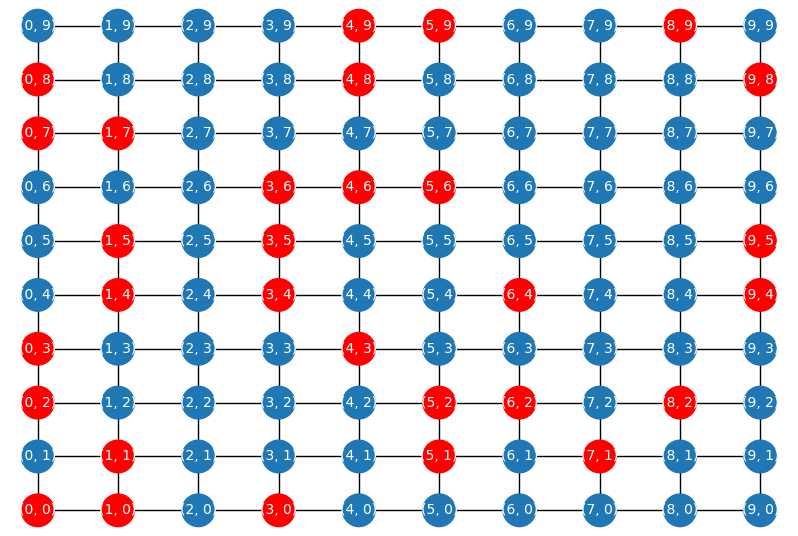

In [41]:
removed_nodes = sample(grid.nodes(), BARRIERS_NUMBER)

colors = ['r' if n in removed_nodes else '#1f78b4' for n in grid.nodes()]

positions = {p: p for p in grid.nodes()}
nx.draw(grid, pos=positions, with_labels=True, font_size=10, node_size=550, font_color='w', node_color=colors)

### Red nodes are barrier
### Blue nodes are free way

<IPython.core.display.Javascript object>


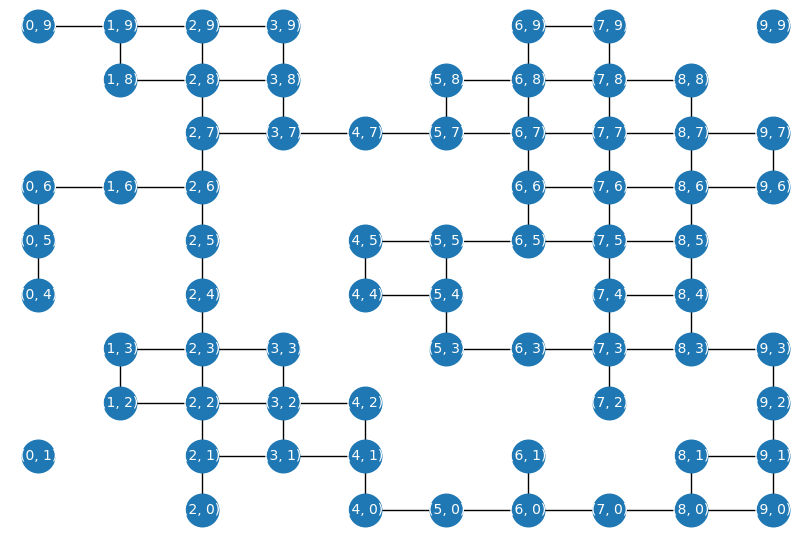

In [42]:
grid.remove_nodes_from(removed_nodes)
nx.draw(grid, pos=positions, with_labels=True, font_size=10, node_size=550, font_color='w')

### Graph (Grid) without barrier

In [43]:
start, end = sample(grid.nodes(), 2)
print(f'start is {start}, end is {end}')

start is (6, 9), end is (9, 6)


In [44]:
def heuristic(node1, node2):
    x1, y1 = node1
    x2, y2 = node2
    return np.linalg.norm((x1 - x2, y1 - y2))

In [45]:
path = nx.astar_path(grid, start, end, heuristic)

<IPython.core.display.Javascript object>


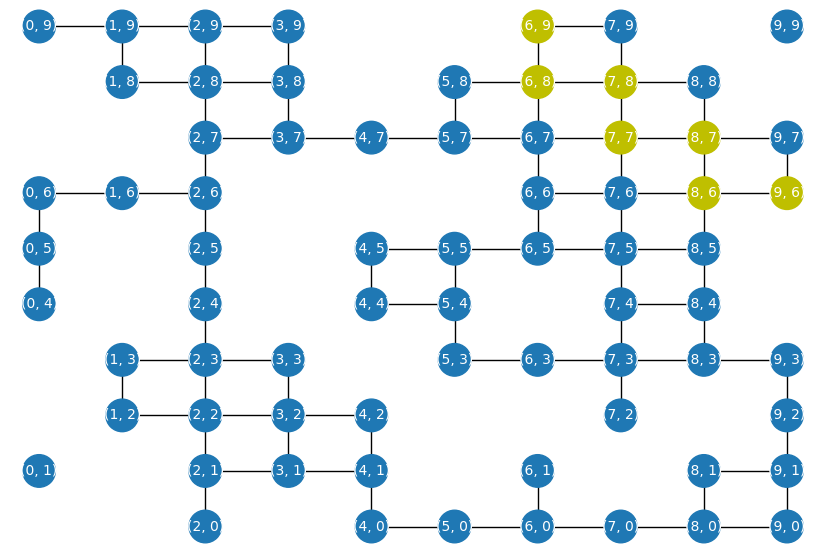

In [46]:
colors = ['y' if n in path else '#1f78b4' for n in grid.nodes()]
nx.draw(grid, pos=positions, with_labels=True, font_size=10, node_size=550, font_color='w', node_color=colors)

### Yellow nodes are path that A* found

In [47]:
for i in range(1, ITERS + 1):
    print(f'Iteration is {i}')
    start, end = sample(grid.nodes(), 2)
    print(nx.astar_path(grid, start, end, heuristic), end='\n\n')

Iteration is 1
[(7, 6), (6, 6), (6, 7), (5, 7), (4, 7), (3, 7), (2, 7), (2, 6), (2, 5), (2, 4), (2, 3), (2, 2), (2, 1), (2, 0)]

Iteration is 2
[(5, 3), (6, 3), (7, 3), (8, 3), (9, 3), (9, 2), (9, 1), (8, 1), (8, 0)]

Iteration is 3
[(2, 4), (2, 5), (2, 6), (2, 7), (3, 7), (4, 7), (5, 7), (6, 7), (6, 6)]

Iteration is 4
[(9, 3), (8, 3), (7, 3), (7, 4), (7, 5), (6, 5), (6, 6), (6, 7), (5, 7), (4, 7), (3, 7)]

Iteration is 5
[(2, 4), (2, 5), (2, 6), (2, 7), (3, 7), (4, 7), (5, 7)]

Iteration is 6
[(5, 8), (6, 8), (7, 8)]

Iteration is 7
[(4, 0), (5, 0), (6, 0), (7, 0), (8, 0), (9, 0), (9, 1)]

Iteration is 8
[(6, 5), (7, 5), (7, 4), (8, 4)]

Iteration is 9
[(6, 0), (5, 0), (4, 0), (4, 1), (4, 2), (3, 2), (3, 3), (2, 3), (2, 4)]

Iteration is 10
[(8, 0), (7, 0), (6, 0), (5, 0), (4, 0), (4, 1), (3, 1), (3, 2)]



## Conclusion

A* algorithm finds shortest path between two vertices unlike Dijkstra's and Bellman-Ford algorithms that find all shortest paths between source vertex and all other. The main idea is Dijkstra's algorithm and modification. Modification is adding of function of path assessment that help to choose vertices more close to target node. Theoretical working time like Dijkstra's algorithm.